# Feature Engineering in Time-Series Data #
1. Goals/Benefits of Feature Engineering on Time-Series Data

Feature engineering in time series data is crucial for enhancing model performance and extracting meaningful insights. The main goals and benefits include:

Improved Model Accuracy: By incorporating derived features like trends, seasonal patterns, and lagged values, models can better capture the underlying structure of the data.
Enhanced Understanding of Data: Features like day, month, year, and rolling averages help in understanding the temporal dynamics of the dataset.
Handling Non-Linear Relationships: Features like rolling averages and lags can help in modeling non-linear relationships in time series data.
Forecasting Readiness: By transforming time series data into a format that machine learning models can process, feature engineering makes forecasting more effective.
Performing Feature Engineering

Let's perform the specified feature engineering tasks on the dataset and report the results:

1. Date Time Features
Extract Year, Month, and Day from the Date column.

2. Lag Features
Create lag features for the same day last week, last month, and last year.

3. Window Features
Calculate a 2-month rolling average.

4. Expanding Feature
Create a feature that shows the maximum value till the current date.

5. Quarterly Data
Generate a new column 'Q' showing quarterly data using resample function.

6. Yearly Data
Show the yearly data using a similar approach to the quarterly data.

Let's proceed with the Python implementation for these tasks.

Before proceding with feature engineering steps adding the steps we performed from Part-1.

In [48]:
# Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('AirPassengers.csv')


In [49]:
# Descriptive Statistics
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [50]:
# Parse date column
df['Month'] = pd.to_datetime(df['Month'])
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


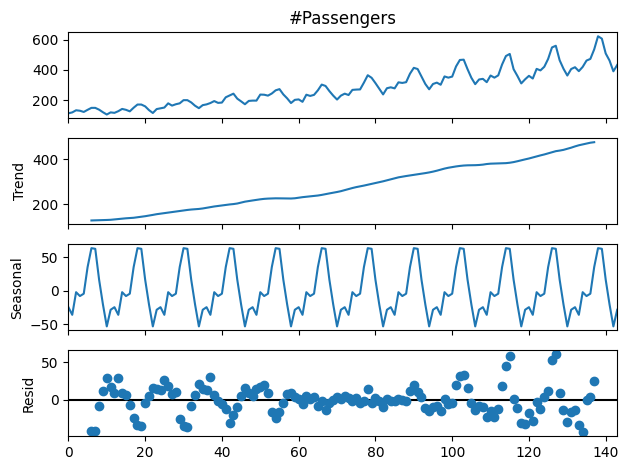

In [51]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df['#Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()

In [52]:
# 1. Date Time Features
df['Year'] = df['Month'].dt.year
df['Month_Number'] = df['Month'].dt.month  # Renamed to avoid confusion with the 'Month' column
df['Day'] = df['Month'].dt.day

df.head()


,Month,#Passengers,Year,Month_Number,Day
0,1949-01-01,112,1949,1,1
1,1949-02-01,118,1949,2,1
2,1949-03-01,132,1949,3,1
3,1949-04-01,129,1949,4,1
4,1949-05-01,121,1949,5,1


In [53]:
# 2. Lag Features
df['Lag_Same_Day_Last_Week'] = df['#Passengers'].shift(7)
df['Lag_Same_Day_Last_Month'] = df['#Passengers'].shift(30)
df['Lag_Same_Day_Last_Year'] = df['#Passengers'].shift(365)


In [54]:
df.head()

,Month,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year
0,1949-01-01,112,1949,1,1,NaN,NaN,NaN
1,1949-02-01,118,1949,2,1,NaN,NaN,NaN
2,1949-03-01,132,1949,3,1,NaN,NaN,NaN
3,1949-04-01,129,1949,4,1,NaN,NaN,NaN
4,1949-05-01,121,1949,5,1,NaN,NaN,NaN


In [55]:
df.tail()

,Month,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year
139,1960-08-01,606,1960,8,1,417.0,318.0,NaN
140,1960-09-01,508,1960,9,1,391.0,362.0,NaN
141,1960-10-01,461,1960,10,1,419.0,348.0,NaN
142,1960-11-01,390,1960,11,1,461.0,363.0,NaN
143,1960-12-01,432,1960,12,1,472.0,435.0,NaN


Lag features for the same day last week, last month, and last year were added. Initial rows contain NaN values due to the absence of prior data for those periods.

In [56]:
# 3. Window Features
df['2_Month_Rolling_Average'] = df['#Passengers'].rolling(window=60).mean()

In [57]:
df.head()

,Month,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year,2_Month_Rolling_Average
0,1949-01-01,112,1949,1,1,NaN,NaN,NaN,NaN
1,1949-02-01,118,1949,2,1,NaN,NaN,NaN,NaN
2,1949-03-01,132,1949,3,1,NaN,NaN,NaN,NaN
3,1949-04-01,129,1949,4,1,NaN,NaN,NaN,NaN
4,1949-05-01,121,1949,5,1,NaN,NaN,NaN,NaN


In [58]:
df.tail()

,Month,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year,2_Month_Rolling_Average
139,1960-08-01,606,1960,8,1,417.0,318.0,NaN,384.933333
140,1960-09-01,508,1960,9,1,391.0,362.0,NaN,388.200000
141,1960-10-01,461,1960,10,1,419.0,348.0,NaN,391.316667
142,1960-11-01,390,1960,11,1,461.0,363.0,NaN,393.866667
143,1960-12-01,432,1960,12,1,472.0,435.0,NaN,396.433333


2-Month Rolling Average: This feature reflects the average number of passengers over a rolling window of two months.
We can see from the tail results the average is increasing constantly.

In [59]:
# 4. Expanding Feature
df['Max_Till_Date'] = df['#Passengers'].expanding().max()

In [60]:
df.head()

,Month,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year,2_Month_Rolling_Average,Max_Till_Date
0,1949-01-01,112,1949,1,1,NaN,NaN,NaN,NaN,112.0
1,1949-02-01,118,1949,2,1,NaN,NaN,NaN,NaN,118.0
2,1949-03-01,132,1949,3,1,NaN,NaN,NaN,NaN,132.0
3,1949-04-01,129,1949,4,1,NaN,NaN,NaN,NaN,132.0
4,1949-05-01,121,1949,5,1,NaN,NaN,NaN,NaN,132.0


Max Till Date: This column shows the maximum number of passengers up to that date in the dataset.

In [61]:
# 5. Quarterly Data
df_quarterly = df.resample('Q', on='Month').mean()
df_quarterly['Quarter'] = df_quarterly.index.quarter
df['Quarterly_Mean'] = df_quarterly['#Passengers']


In [62]:
df_quarterly.head()

,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year,2_Month_Rolling_Average,Max_Till_Date,Quarter
Month,,,,,,,,,,
1949-03-31,120.666667,1949.0,2.0,1.0,NaN,NaN,NaN,NaN,120.666667,1
1949-06-30,128.333333,1949.0,5.0,1.0,NaN,NaN,NaN,NaN,133.000000,2
1949-09-30,144.000000,1949.0,8.0,1.0,115.000000,NaN,NaN,NaN,148.000000,3
1949-12-31,113.666667,1949.0,11.0,1.0,127.333333,NaN,NaN,NaN,148.000000,4
1950-03-31,127.333333,1950.0,2.0,1.0,143.666667,NaN,NaN,NaN,148.000000,1


Quarterly Mean: The resampled data shows the average number of passengers on a quarterly basis. Each quarter is represented with its mean value.

In [63]:
# 6. Yearly Data
df_yearly = df.resample('Y', on='Month').mean()
df_yearly['Year'] = df_yearly.index.year
df['Yearly_Mean'] = df_yearly['#Passengers']

In [64]:
df_yearly.head()

,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year,2_Month_Rolling_Average,Max_Till_Date,Quarterly_Mean
Month,,,,,,,,,,
1949-12-31,126.666667,1949,6.5,1.0,122.400000,NaN,NaN,NaN,137.416667,NaN
1950-12-31,139.666667,1950,6.5,1.0,129.166667,NaN,NaN,NaN,159.083333,NaN
1951-12-31,170.166667,1951,6.5,1.0,153.500000,124.500000,NaN,NaN,187.166667,NaN
1952-12-31,197.000000,1952,6.5,1.0,178.500000,130.333333,NaN,NaN,221.083333,NaN
1953-12-31,225.000000,1953,6.5,1.0,212.333333,155.916667,NaN,171.7,256.416667,NaN


Yearly Mean: The dataset also includes yearly average passenger numbers.

The issue with NaN values in the Quarterly_Mean and Yearly_Mean columns arises from a mismatch between the indices of the original DataFrame df and the resampled DataFrames df_quarterly and df_yearly. When we resample the data on a quarterly or yearly basis, the resulting DataFrame has a different time index compared to the original monthly data. Thus, when trying to assign these values back to the original DataFrame, pandas cannot find matching indices and fills these with NaN.

To resolve this, we can use a different method. Instead of merging, we can directly compute the quarterly and yearly means within the original DataFrame by transforming these means to align with the monthly data.

Let's apply this method to correctly calculate the Quarterly_Mean and Yearly_Mean. ​​

In [66]:
# Quarterly Mean Calculation
df['Quarter'] = df['Month'].dt.to_period('Q')
quarterly_mean = df.groupby('Quarter')['#Passengers'].transform('mean')
df['Quarterly_Mean'] = quarterly_mean

# Yearly Mean Calculation
df['Year'] = df['Month'].dt.to_period('Y')
yearly_mean = df.groupby('Year')['#Passengers'].transform('mean')
df['Yearly_Mean'] = yearly_mean

# Displaying the updated DataFrame
df.head()


,Month,#Passengers,Year,Month_Number,Day,Lag_Same_Day_Last_Week,Lag_Same_Day_Last_Month,Lag_Same_Day_Last_Year,2_Month_Rolling_Average,Max_Till_Date,Quarterly_Mean,Yearly_Mean,Quarter
0,1949-01-01,112,1949,1,1,NaN,NaN,NaN,NaN,112.0,120.666667,126.666667,1949Q1
1,1949-02-01,118,1949,2,1,NaN,NaN,NaN,NaN,118.0,120.666667,126.666667,1949Q1
2,1949-03-01,132,1949,3,1,NaN,NaN,NaN,NaN,132.0,120.666667,126.666667,1949Q1
3,1949-04-01,129,1949,4,1,NaN,NaN,NaN,NaN,132.0,128.333333,126.666667,1949Q2
4,1949-05-01,121,1949,5,1,NaN,NaN,NaN,NaN,132.0,128.333333,126.666667,1949Q2


Quarterly_Mean: Represents the average number of passengers in each quarter, aligned with each month within that quarter.
Yearly_Mean: Shows the average number of passengers for each year, repeated across all months within that year

## 3. Additional Insights and Building a Better Forecasting Solution ##
By leveraging these additional features:

We gain a more nuanced understanding of temporal patterns at different granularities (daily, weekly, monthly, quarterly, yearly).
Lag features can help in understanding delayed effects, such as seasonal or economic impacts on passenger numbers.
Rolling averages smooth out short-term fluctuations, highlighting longer-term trends.
The expanding maximum feature gives an idea of peak demand up to any given point.
Incorporating these features into a time series forecasting model can significantly enhance its performance. For instance, understanding seasonal trends and incorporating lagged values can improve the accuracy of predictions. The model can also become more robust in handling fluctuations and anomalies in the data.

Overall, these engineered features enrich the dataset, providing a multifaceted view of the time series, which is crucial for building more accurate and reliable forecasting models in the field of data science.